In [7]:
import pandas as pd
from scipy import stats
import numpy as np
import scikit_posthocs as sp
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

df = pd.read_csv("../data/Resultados - Multigenre.csv", decimal=',')
df.head()

,Modelo,Versão,Porttinari-base Test Acc,DANTE Test Acc,PetroGold Test Acc
0,Porttinari-base,model-1o0gqxr3-v0,0.990491,0.877199,0.965403
1,Porttinari-base,model-2bw1espl-v0,0.990372,0.870316,0.964483
2,Porttinari-base,model-2s49nst7-v0,0.990163,0.868022,0.964759
3,Porttinari-base,model-3rjlz0lt-v0,0.990968,0.870635,0.964483
4,Porttinari-base,model-9ntjk1ug-v0,0.990760,0.871654,0.963379


In [20]:
df["Modelo"] = df["Modelo"].str.replace("Porttinari-base", "Porttinari")
df["Modelo"] = df["Modelo"].str.replace("DANTE", "DANTEStocks")

In [21]:
df.groupby("Modelo").mean()

C:\Users\huber\AppData\Local\Temp\ipykernel_23392\1626612410.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Modelo").mean()


,Porttinari-base Test Acc,DANTE Test Acc,PetroGold Test Acc
Modelo,,,
DANTEStocks,0.965491,0.979843,0.949540
DANTEStocks PetroGold,0.978622,0.979856,0.989225
PetroGold,0.969885,0.849592,0.989336
Porttinari,0.990709,0.871380,0.964603
Porttinari DANTEStocks,0.990494,0.979136,0.965817
Porttinari DANTEStocks PetroGold,0.990044,0.979174,0.988949
Porttinari PetroGold,0.989457,0.852944,0.988480


In [22]:
df.groupby("Modelo").std()

C:\Users\huber\AppData\Local\Temp\ipykernel_23392\2133215191.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Modelo").std()


,Porttinari-base Test Acc,DANTE Test Acc,PetroGold Test Acc
Modelo,,,
DANTEStocks,0.002250,0.000764,0.001958
DANTEStocks PetroGold,0.000612,0.000740,0.000536
PetroGold,0.001029,0.004605,0.000505
Porttinari,0.000310,0.005914,0.001675
Porttinari DANTEStocks,0.000350,0.001042,0.001606
Porttinari DANTEStocks PetroGold,0.000480,0.001260,0.000609
Porttinari PetroGold,0.000643,0.003405,0.000705


In [23]:
print("Models: ", df["Modelo"].unique())

Models:  ['Porttinari' 'DANTEStocks' 'PetroGold' 'Porttinari DANTEStocks'
 'Porttinari PetroGold' 'DANTEStocks PetroGold'
 'Porttinari DANTEStocks PetroGold']


In [24]:
import statsmodels.stats.multicomp as multi

def get_tukey_df(df, target_col, model_col="Modelo", alpha=0.05):
    mcDate = multi.MultiComparison(df[target_col], df[model_col])
    Results = mcDate.tukeyhsd(alpha=alpha)
    other_df = pd.DataFrame(data=Results._results_table.data[1:], columns=Results._results_table.data[0])
    modelos = df[model_col].unique()
    new_df = pd.DataFrame([[0]*len(modelos)] * len(modelos), columns=modelos, index=modelos)
    for modelo in modelos:
        new_df.loc[modelo, modelo] = "-"
    for i, row in other_df.iterrows():
        new_df.loc[row["group1"], row["group2"]] = row["p-adj"]
        new_df.loc[row["group2"], row["group1"]] = row["p-adj"]
    return new_df.style.apply(lambda x: ["background: red" if isinstance(v, float) and v < alpha else "" for v in x], axis = 1)

## Anova + Tukey

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway

target = "Porttinari-base Test Acc"
results = []
for model_name in df["Modelo"].unique():
    results.append( df[df["Modelo"] == model_name][target].values )

print("Analysing results for Porttinari-base")
print("Anova analysis:")
print(f_oneway(*results))

Analysing results for Porttinari-base
Anova analysis:
F_onewayResult(statistic=1107.7847275740141, pvalue=7.34547633040194e-62)


In [26]:
tukey = pairwise_tukeyhsd(endog=df['Porttinari-base Test Acc'],
                          groups=df['Modelo'],
                          alpha=0.05)

#display results
print(tukey)

                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                           
             group1                           group2              meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------------
                     DANTEStocks            DANTEStocks PetroGold   0.0131    0.0  0.0117  0.0145   True
                     DANTEStocks                        PetroGold   0.0044    0.0   0.003  0.0058   True
                     DANTEStocks                       Porttinari   0.0252    0.0  0.0238  0.0266   True
                     DANTEStocks           Porttinari DANTEStocks    0.025    0.0  0.0236  0.0264   True
                     DANTEStocks Porttinari DANTEStocks PetroGold   0.0246    0.0  0.0232  0.0259   True
                     DANTEStocks             Porttinari PetroGold    0.024    0.0  0.0226  0.0254   True
           DANTEStocks PetroGold                       

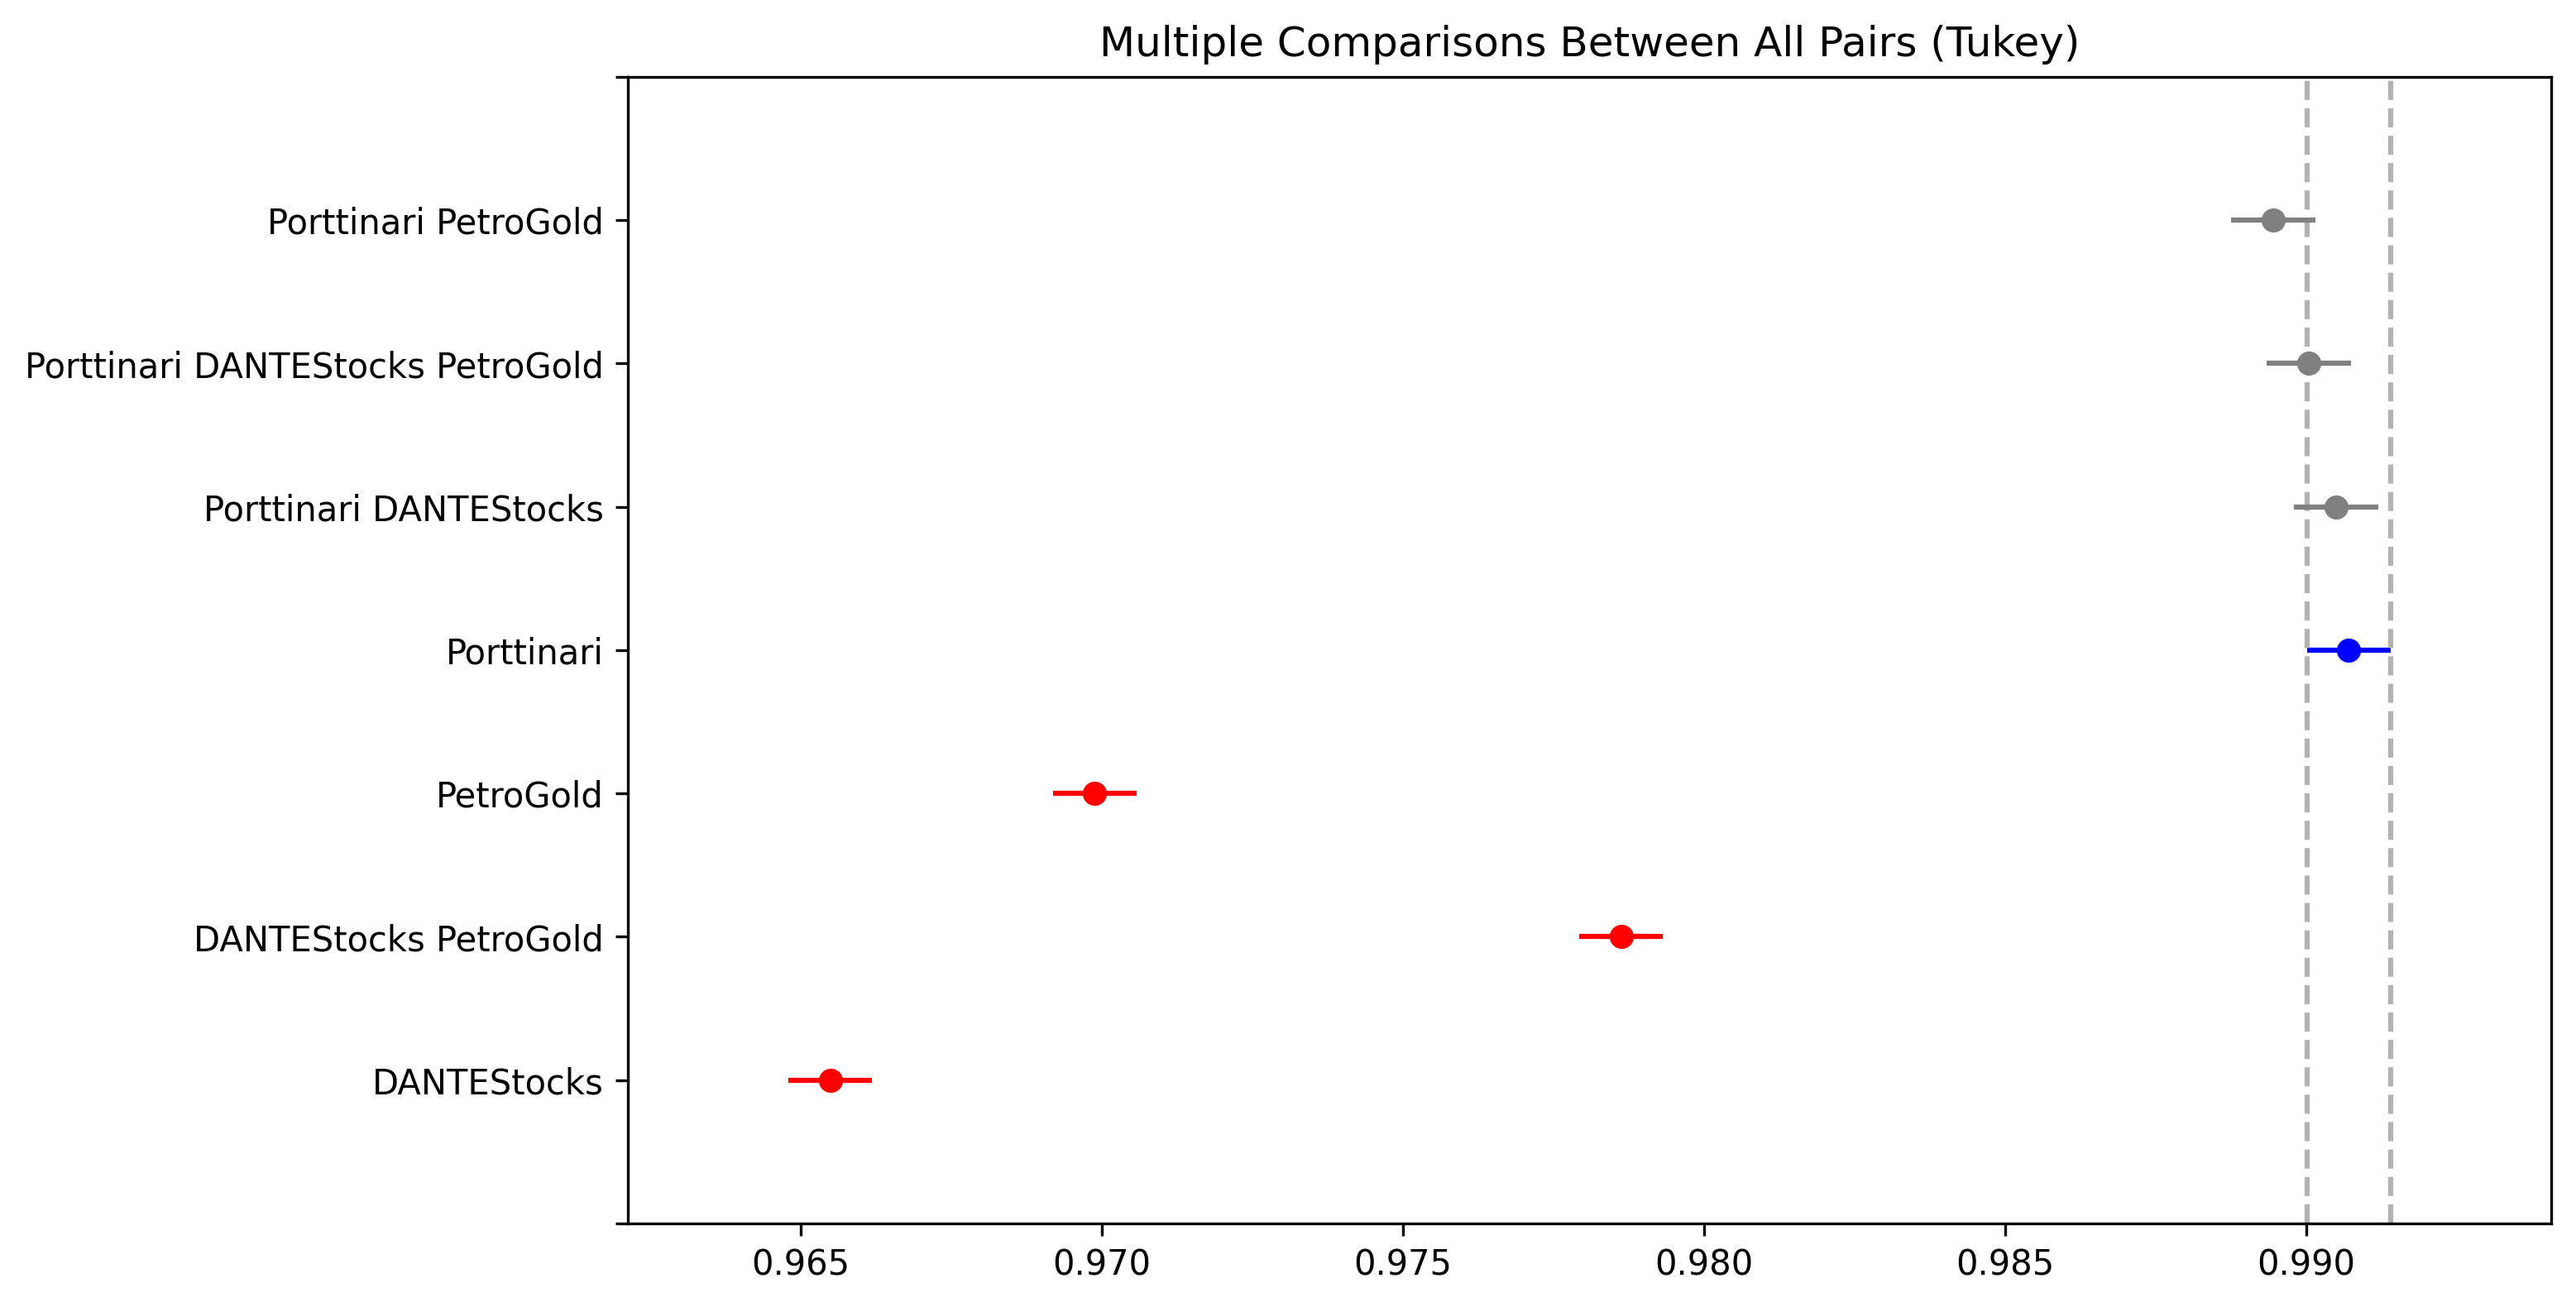

In [27]:
fig1 = tukey.plot_simultaneous("Porttinari")

In [28]:
get_tukey_df(df, "Porttinari-base Test Acc")

,Porttinari,DANTEStocks,PetroGold,Porttinari DANTEStocks,Porttinari PetroGold,DANTEStocks PetroGold,Porttinari DANTEStocks PetroGold
Porttinari,-,0.000000,0.000000,0.999200,0.107600,0.000000,0.772800
DANTEStocks,0.000000,-,0.000000,0.000000,0.000000,0.000000,0.000000
PetroGold,0.000000,0.000000,-,0.000000,0.000000,0.000000,0.000000
Porttinari DANTEStocks,0.999200,0.000000,0.000000,-,0.278700,0.000000,0.956200
Porttinari PetroGold,0.107600,0.000000,0.000000,0.278700,-,0.000000,0.858300
DANTEStocks PetroGold,0.000000,0.000000,0.000000,0.000000,0.000000,-,0.000000
Porttinari DANTEStocks PetroGold,0.772800,0.000000,0.000000,0.956200,0.858300,0.000000,-


In [34]:
target = "DANTE Test Acc"
results = []
for model_name in df["Modelo"].unique():
    results.append( df[df["Modelo"] == model_name][target].values )

print("Analysing results for Porttinari-base")
print("Anova analysis:")
print(f_oneway(*results))

Analysing results for Porttinari-base
Anova analysis:
F_onewayResult(statistic=4171.225262356631, pvalue=6.738240775758726e-80)


In [29]:
tukey = pairwise_tukeyhsd(endog=df['DANTE Test Acc'],
                          groups=df['Modelo'],
                          alpha=0.05)

#display results
print(tukey)

                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                           
             group1                           group2              meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------------
                     DANTEStocks            DANTEStocks PetroGold      0.0    1.0 -0.0043  0.0044  False
                     DANTEStocks                        PetroGold  -0.1303    0.0 -0.1346 -0.1259   True
                     DANTEStocks                       Porttinari  -0.1085    0.0 -0.1128 -0.1041   True
                     DANTEStocks           Porttinari DANTEStocks  -0.0007 0.9988 -0.0051  0.0036  False
                     DANTEStocks Porttinari DANTEStocks PetroGold  -0.0007 0.9992  -0.005  0.0037  False
                     DANTEStocks             Porttinari PetroGold  -0.1269    0.0 -0.1313 -0.1225   True
           DANTEStocks PetroGold                       

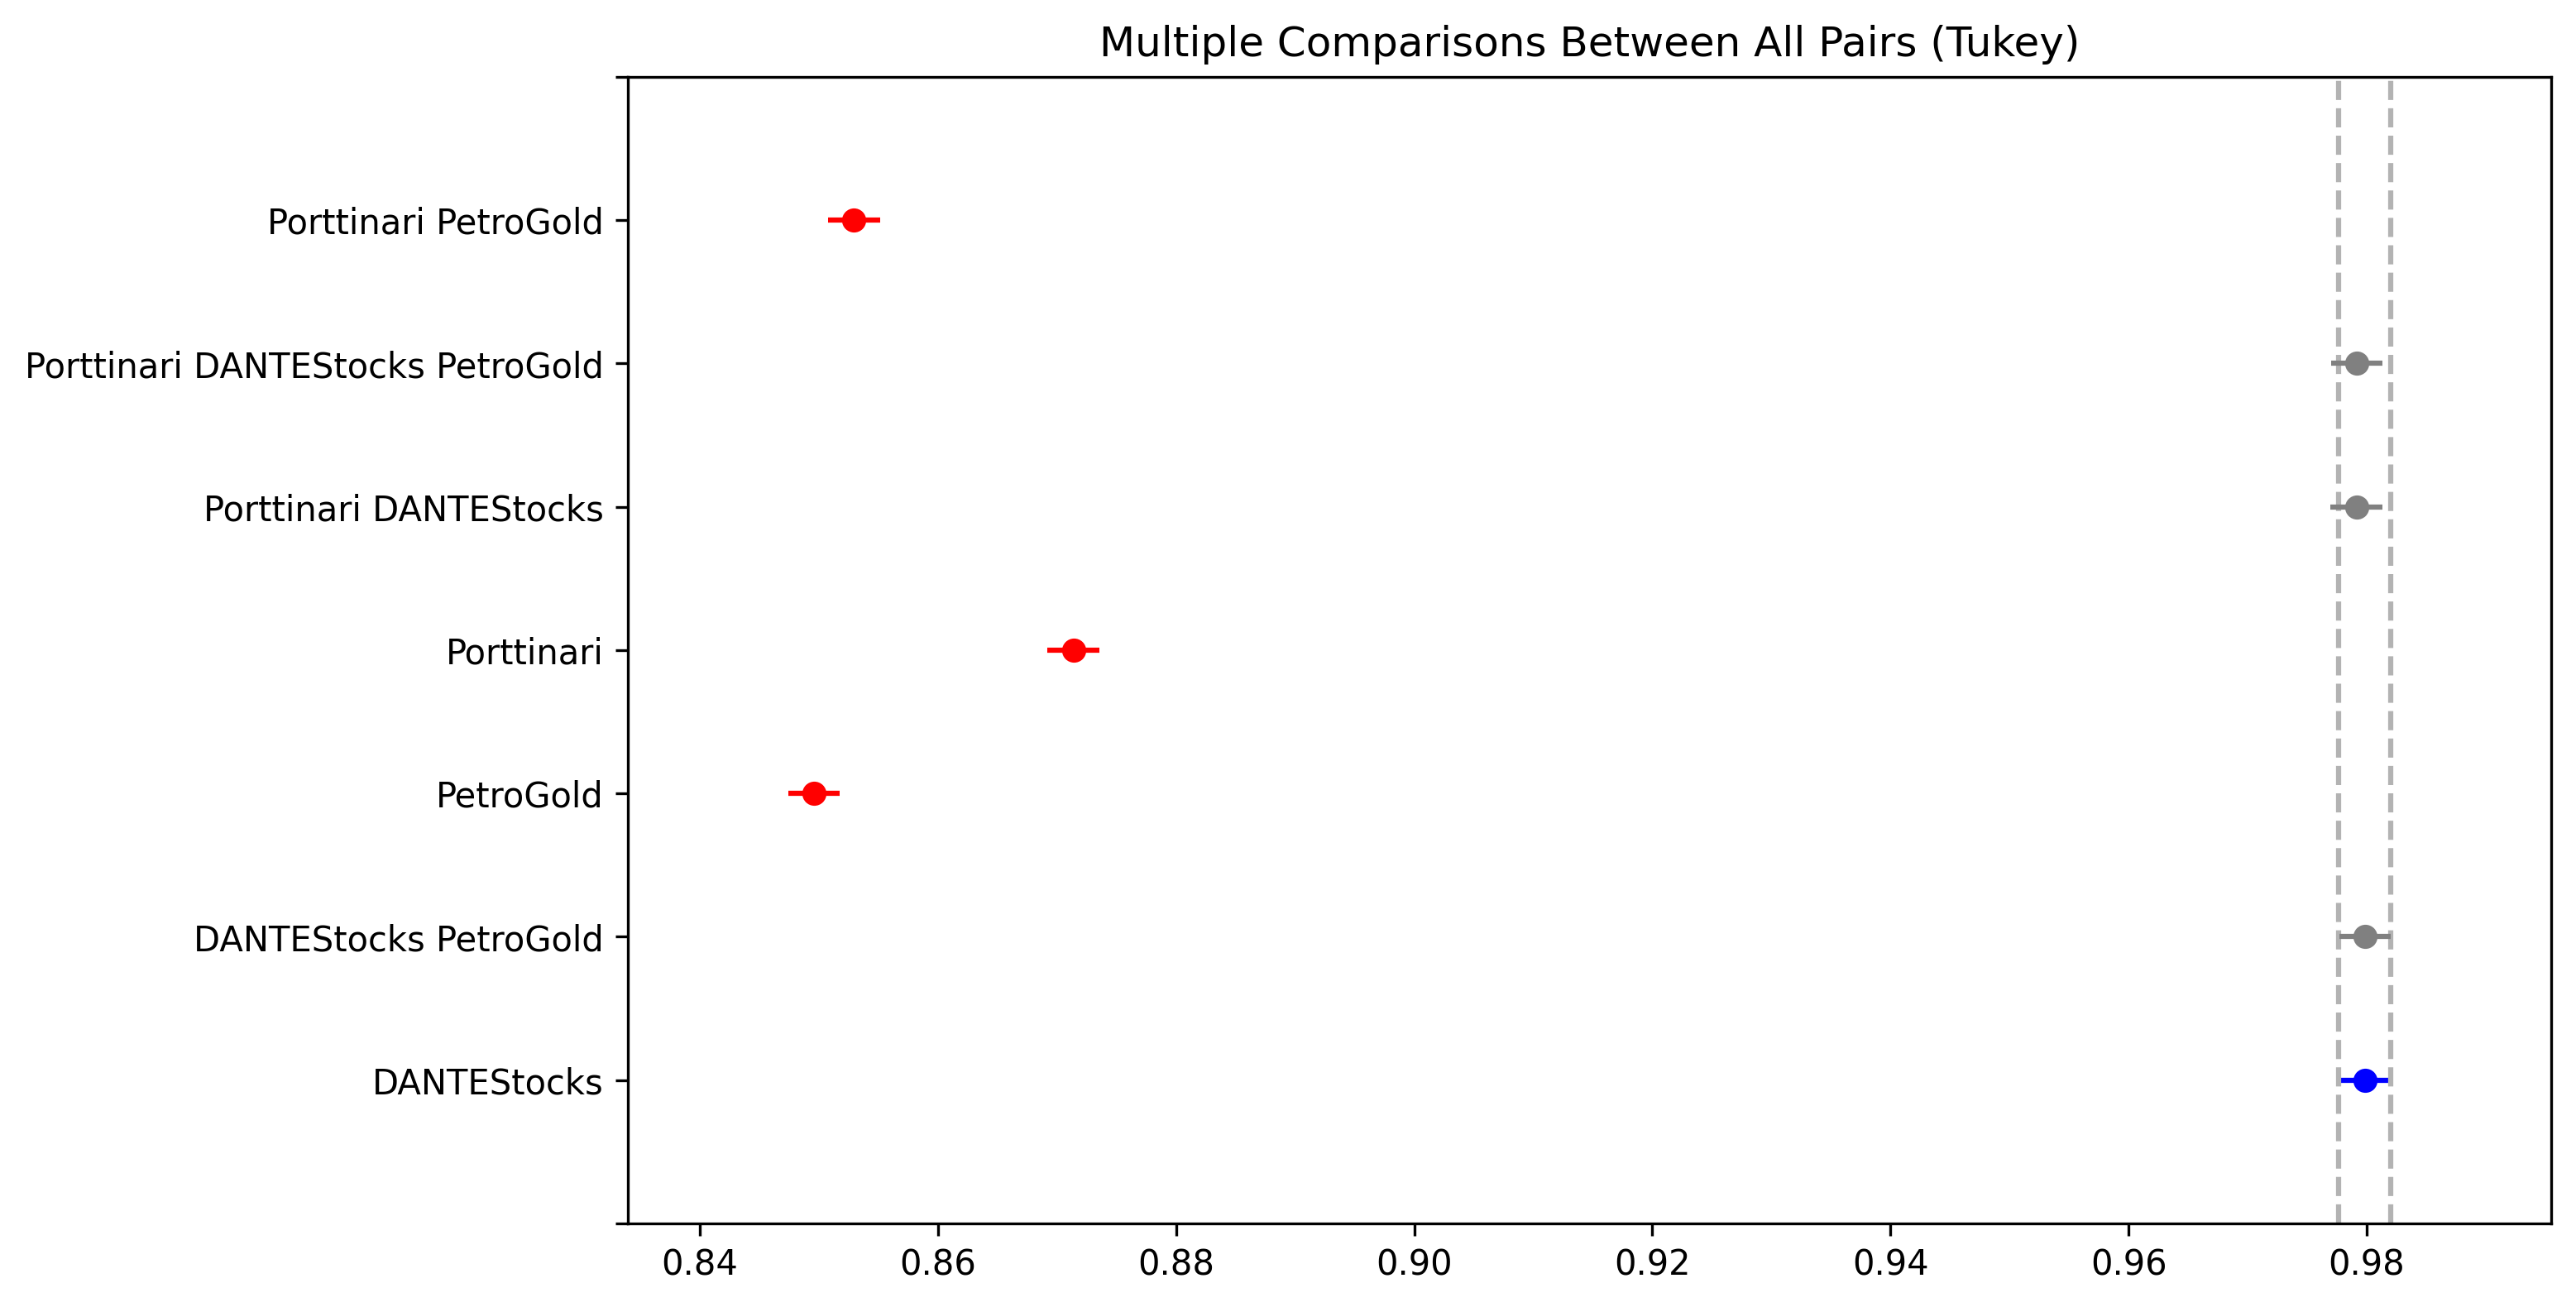

In [32]:
fig2 = tukey.plot_simultaneous("DANTEStocks")

In [33]:
get_tukey_df(df, "DANTE Test Acc")

,Porttinari,DANTEStocks,PetroGold,Porttinari DANTEStocks,Porttinari PetroGold,DANTEStocks PetroGold,Porttinari DANTEStocks PetroGold
Porttinari,-,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DANTEStocks,0.000000,-,0.000000,0.998800,0.000000,1.000000,0.999200
PetroGold,0.000000,0.000000,-,0.000000,0.240100,0.000000,0.000000
Porttinari DANTEStocks,0.000000,0.998800,0.000000,-,0.000000,0.998700,1.000000
Porttinari PetroGold,0.000000,0.000000,0.240100,0.000000,-,0.000000,0.000000
DANTEStocks PetroGold,0.000000,1.000000,0.000000,0.998700,0.000000,-,0.999100
Porttinari DANTEStocks PetroGold,0.000000,0.999200,0.000000,1.000000,0.000000,0.999100,-


In [35]:
target = "PetroGold Test Acc"
results = []
for model_name in df["Modelo"].unique():
    results.append( df[df["Modelo"] == model_name][target].values )

print("Analysing results for Porttinari-base")
print("Anova analysis:")
print(f_oneway(*results))

Analysing results for Porttinari-base
Anova analysis:
F_onewayResult(statistic=1764.8727428082266, pvalue=3.513557237067017e-68)


In [36]:
tukey = pairwise_tukeyhsd(endog=df['PetroGold Test Acc'],
                          groups=df['Modelo'],
                          alpha=0.05)

#display results
print(tukey)

                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                           
             group1                           group2              meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------------
                     DANTEStocks            DANTEStocks PetroGold   0.0397    0.0   0.038  0.0414   True
                     DANTEStocks                        PetroGold   0.0398    0.0  0.0381  0.0415   True
                     DANTEStocks                       Porttinari   0.0151    0.0  0.0134  0.0167   True
                     DANTEStocks           Porttinari DANTEStocks   0.0163    0.0  0.0146   0.018   True
                     DANTEStocks Porttinari DANTEStocks PetroGold   0.0394    0.0  0.0377  0.0411   True
                     DANTEStocks             Porttinari PetroGold   0.0389    0.0  0.0373  0.0406   True
           DANTEStocks PetroGold                       

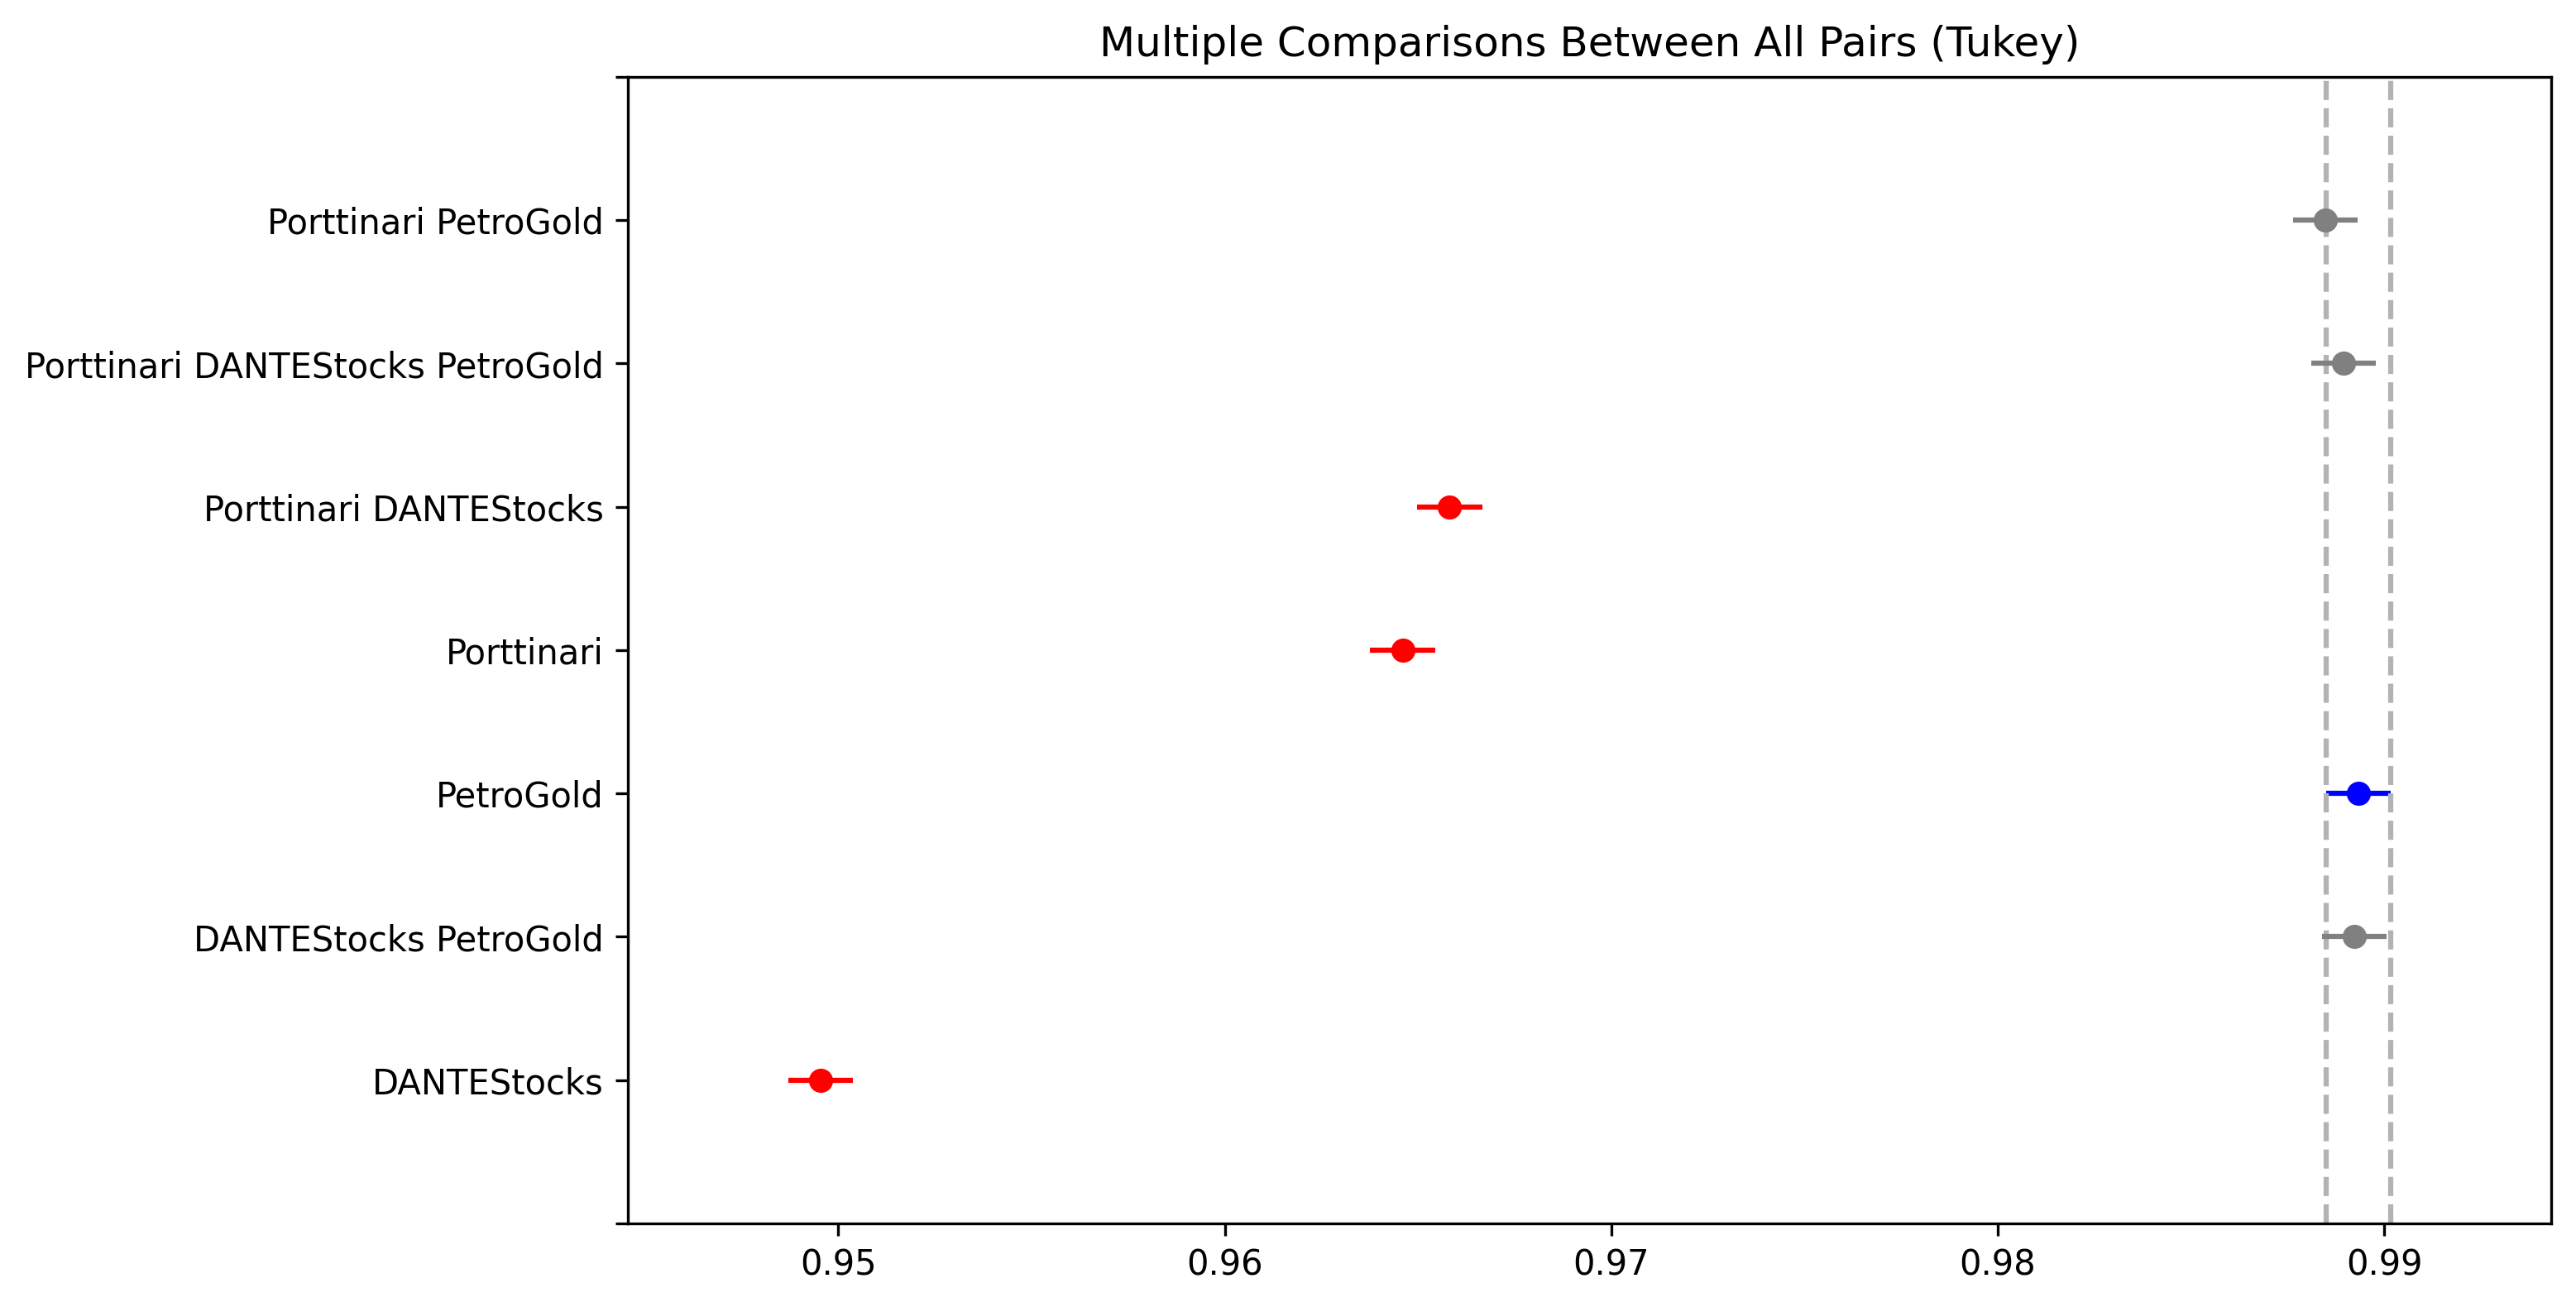

In [37]:
fig3 = tukey.plot_simultaneous("PetroGold")

In [38]:
get_tukey_df(df, "PetroGold Test Acc")

,Porttinari,DANTEStocks,PetroGold,Porttinari DANTEStocks,Porttinari PetroGold,DANTEStocks PetroGold,Porttinari DANTEStocks PetroGold
Porttinari,-,0.000000,0.000000,0.308100,0.000000,0.000000,0.000000
DANTEStocks,0.000000,-,0.000000,0.000000,0.000000,0.000000,0.000000
PetroGold,0.000000,0.000000,-,0.000000,0.712000,1.000000,0.992100
Porttinari DANTEStocks,0.308100,0.000000,0.000000,-,0.000000,0.000000,0.000000
Porttinari PetroGold,0.000000,0.000000,0.712000,0.000000,-,0.824200,0.978200
DANTEStocks PetroGold,0.000000,0.000000,1.000000,0.000000,0.824200,-,0.998800
Porttinari DANTEStocks PetroGold,0.000000,0.000000,0.992100,0.000000,0.978200,0.998800,-


In [4]:
target = "Porttinari-base Test Acc"
results = []
for model_name in df["Modelo"].unique():
    results.append( df[df["Modelo"] == model_name][target].values )

print("Analysing results for Porttinari-base")
print("Kruskal analysis:")
print(stats.kruskal(*results))

print("Posthoc Dunn:")
alpha = .05
res_df = sp.posthoc_dunn(results, p_adjust = 'fdr_bh')
res_df.columns = df["Modelo"].unique()
res_df.index = df["Modelo"].unique()
res_df.style.apply(lambda x: ["background: red" if v > alpha else "" for v in x], axis = 1)

Analysing results for Porttinari-base
Kruskal analysis:
KruskalResult(statistic=63.206550233624455, pvalue=1.0017811188858709e-11)
Posthoc Dunn:


,Porttinari-base,DANTE,PetroGold,Porttinari-base DANTE,Porttinari-base PetroGold,DANTE PetroGold,Porttinari-base DANTE PetroGold
Porttinari-base,1.000000,0.000000,0.000003,0.578946,0.020939,0.000292,0.148736
DANTE,0.000000,1.000000,0.344885,0.000000,0.001340,0.050494,0.000032
PetroGold,0.000003,0.344885,1.000000,0.000032,0.023716,0.312671,0.001411
Porttinari-base DANTE,0.578946,0.000000,0.000032,1.000000,0.064779,0.001698,0.337122
Porttinari-base PetroGold,0.020939,0.001340,0.023716,0.064779,1.000000,0.229361,0.353114
DANTE PetroGold,0.000292,0.050494,0.312671,0.001698,0.229361,1.000000,0.035729
Porttinari-base DANTE PetroGold,0.148736,0.000032,0.001411,0.337122,0.353114,0.035729,1.000000


In [5]:
target = "DANTE Test Acc"
results = []
for model_name in df["Modelo"].unique():
    results.append( df[df["Modelo"] == model_name][target].values )

print("Analysing results for DANTE")
print("Kruskal analysis:")
print(stats.kruskal(*results))

print("Posthoc Dunn:")
alpha = .05
res_df = sp.posthoc_dunn(results, p_adjust = 'fdr_bh')
res_df.columns = df["Modelo"].unique()
res_df.index = df["Modelo"].unique()
res_df.style.apply(lambda x: ["background: red" if v > alpha else "" for v in x], axis = 1)

Analysing results for DANTE
Kruskal analysis:
KruskalResult(statistic=55.95642744617538, pvalue=2.9706142822642387e-10)
Posthoc Dunn:


,Porttinari-base,DANTE,PetroGold,Porttinari-base DANTE,Porttinari-base PetroGold,DANTE PetroGold,Porttinari-base DANTE PetroGold
Porttinari-base,1.000000,0.006776,0.092513,0.035704,0.244201,0.002067,0.031190
DANTE,0.006776,1.000000,0.000013,0.655988,0.000071,0.739805,0.677730
PetroGold,0.092513,0.000013,1.000000,0.000085,0.677730,0.000004,0.000071
Porttinari-base DANTE,0.035704,0.655988,0.000085,1.000000,0.000534,0.440470,0.934310
Porttinari-base PetroGold,0.244201,0.000071,0.677730,0.000534,1.000000,0.000016,0.000439
DANTE PetroGold,0.002067,0.739805,0.000004,0.440470,0.000016,1.000000,0.467158
Porttinari-base DANTE PetroGold,0.031190,0.677730,0.000071,0.934310,0.000439,0.467158,1.000000


In [6]:
target = "PetroGold Test Acc"
results = []
for model_name in df["Modelo"].unique():
    results.append( df[df["Modelo"] == model_name][target].values )

print("Analysing results for PetroGold")
print("Kruskal analysis:")
print(stats.kruskal(*results))

print("Posthoc Dunn:")
alpha = .05
res_df = sp.posthoc_dunn(results, p_adjust = 'fdr_bh')
res_df.columns = df["Modelo"].unique()
res_df.index = df["Modelo"].unique()
res_df.style.apply(lambda x: ["background: red" if v > alpha else "" for v in x], axis = 1)

Analysing results for PetroGold
Kruskal analysis:
KruskalResult(statistic=57.826874113506236, pvalue=1.2423430813648216e-10)
Posthoc Dunn:


,Porttinari-base,DANTE,PetroGold,Porttinari-base DANTE,Porttinari-base PetroGold,DANTE PetroGold,Porttinari-base DANTE PetroGold
Porttinari-base,1.000000,0.214218,0.000125,0.693175,0.019295,0.000265,0.002145
DANTE,0.214218,1.000000,0.000000,0.099622,0.000265,0.000001,0.000015
PetroGold,0.000125,0.000000,1.000000,0.000458,0.147097,0.787694,0.446668
Porttinari-base DANTE,0.693175,0.099622,0.000458,1.000000,0.057695,0.001144,0.008500
Porttinari-base PetroGold,0.019295,0.000265,0.147097,0.057695,1.000000,0.217943,0.534460
DANTE PetroGold,0.000265,0.000001,0.787694,0.001144,0.217943,1.000000,0.574958
Porttinari-base DANTE PetroGold,0.002145,0.000015,0.446668,0.008500,0.534460,0.574958,1.000000


# Analisando resultados em todos os córpus

In [32]:
datasets_columns = list(filter(lambda x: "Test" in x, df.columns))
new_data = {k:[np.mean(df[df["Modelo"] == k][v].values) for v in datasets_columns] for k in df["Modelo"].unique()}
new_df = pd.DataFrame(new_data, index=datasets_columns)
new_df.head()

,Porttinari-base,DANTE,PetroGold,Porttinari-base DANTE,Porttinari-base PetroGold,DANTE PetroGold,Porttinari-base DANTE PetroGold
Porttinari-base Test Acc,0.990709,0.965491,0.969885,0.990494,0.989457,0.978622,0.990044
DANTE Test Acc,0.871380,0.979843,0.849592,0.979136,0.867054,0.979856,0.979174
PetroGold Test Acc,0.964603,0.949540,0.989336,0.965817,0.988480,0.989225,0.988949


In [56]:
alpha = 0.05
st, p = stats.friedmanchisquare(*new_df.values)

reject = p <= alpha
print("Should we reject H0 (i.e. is there a difference in the means) at the", (1-alpha)*100, "% confidence level?", reject)
print("Z = {}, p = {}".format(st, p))

Should we reject H0 (i.e. is there a difference in the means) at the 95.0 % confidence level? False
Z = 2.5714285714285694, p = 0.2764530466295647


In [52]:
if not reject:
    raise Exception("Exiting early. The rankings are only relevant if there was a difference in the means i.e. if we rejected h0 above")

Exception: Exiting early. The rankings are only relevant if there was a difference in the means i.e. if we rejected h0 above

C:\Users\huber\AppData\Local\Temp\ipykernel_24668\674951558.py:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  pairwise_scores.set_axis(labels, axis='columns', inplace=True) # Label the cols
C:\Users\huber\AppData\Local\Temp\ipykernel_24668\674951558.py:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  pairwise_scores.set_axis(labels, axis='rows', inplace=True) # Label the rows, note: same label as pairwise combinations


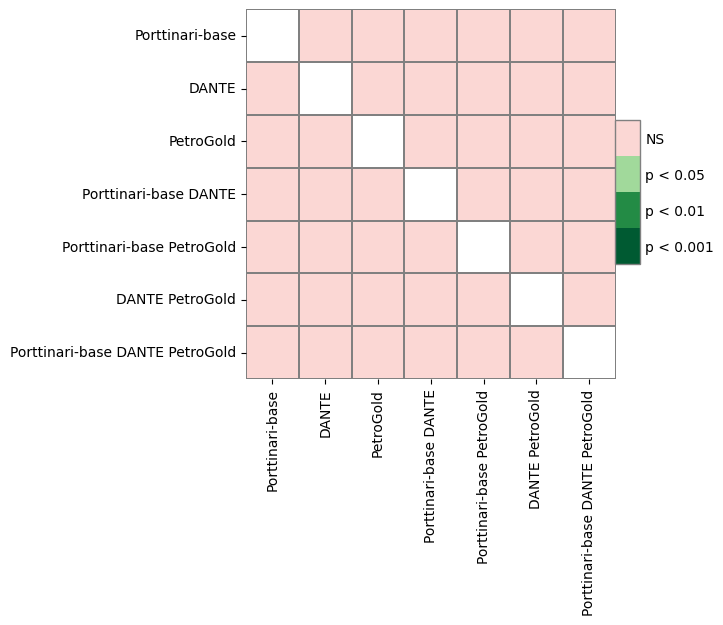

In [55]:
# Helper functions for performing the statistical tests
def generate_scores(method, method_args, data, labels):
    pairwise_scores = method(data, **method_args) # Matrix for all pairwise comaprisons
    pairwise_scores.set_axis(labels, axis='columns', inplace=True) # Label the cols
    pairwise_scores.set_axis(labels, axis='rows', inplace=True) # Label the rows, note: same label as pairwise combinations
    return pairwise_scores

def plot(scores):
    # Pretty plot of significance
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'square': True,
                    'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

    sp.sign_plot(scores, **heatmap_args)

plot(generate_scores(sp.posthoc_nemenyi_friedman, {}, new_df.values, new_df.columns))